In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_cornell_sim = pd.read_csv('cornell_cosine_weights.csv')

In [3]:
df_cornell = df_cornell_sim[['source','target','weight']]
df_cornell['weight']= 1 - df_cornell['weight']
#df_cornell_sim['weight']= 1 / df_cornell_sim['weight']
df_cornell.head()

,source,target,weight
0,0,42,0.933904
1,1,90,0.822454
2,1,82,0.440534
3,1,99,0.958350
4,1,148,0.913652


In [4]:
df_nodes=pd.read_csv('cornell_labels.csv')

In [5]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_cornell['weight'] = scaler.fit_transform(df_cornell[['weight']])#
#df_cornell.head()

In [6]:
df_cornell.describe()

,source,target,weight
count,277.000000,277.000000,277.000000
mean,50.949458,111.411552,0.582317
std,37.129293,45.563107,0.372989
min,0.000000,8.000000,0.015110
25%,25.000000,72.000000,0.177449
50%,42.000000,120.000000,0.796120
75%,71.000000,149.000000,0.928498
max,157.000000,182.000000,0.988446


In [7]:
cornell_graph= nx.from_pandas_edgelist(df_cornell, 'source', 'target', create_using=nx.DiGraph())

In [8]:
cornell_graph.number_of_edges()

277

In [9]:
GNN_dist= nx.from_pandas_edgelist(df_cornell, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [10]:
GNN_sim= nx.from_pandas_edgelist(df_cornell_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_cornell

In [11]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [12]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

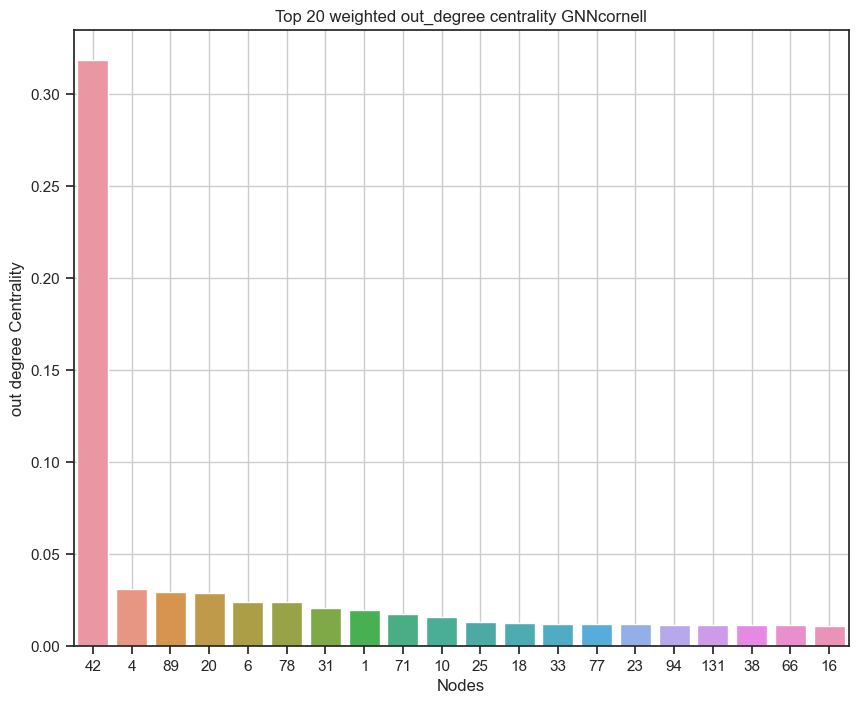

In [13]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNcornell')
plt.grid()
plt.show()

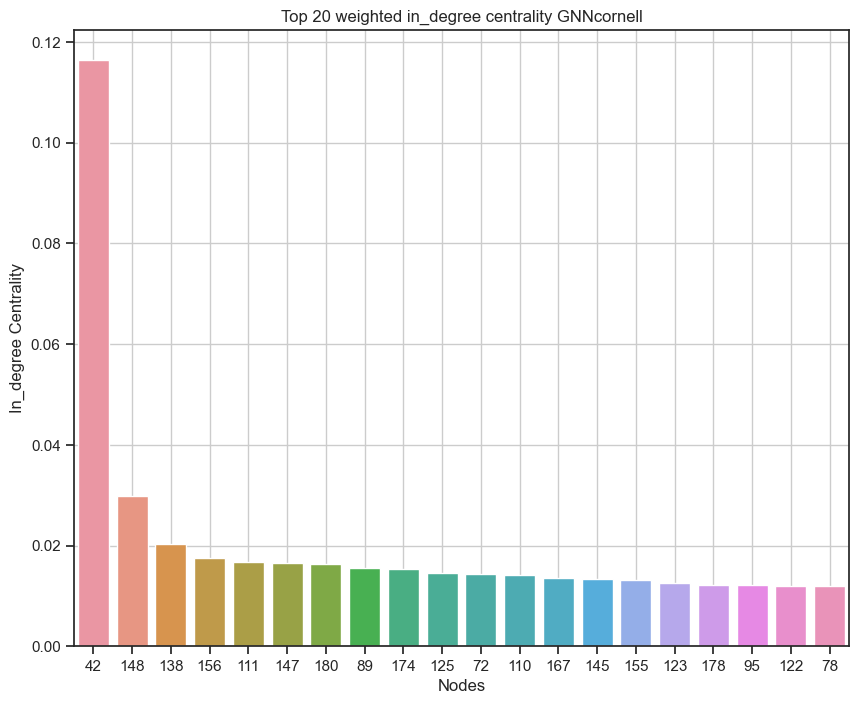

In [14]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNcornell')
plt.grid()
plt.show()

## cornell graph

In [15]:
cornell_out_degree = weighted_out_degree(cornell_graph)
cornell_in_degree = weighted_in_degree(cornell_graph)

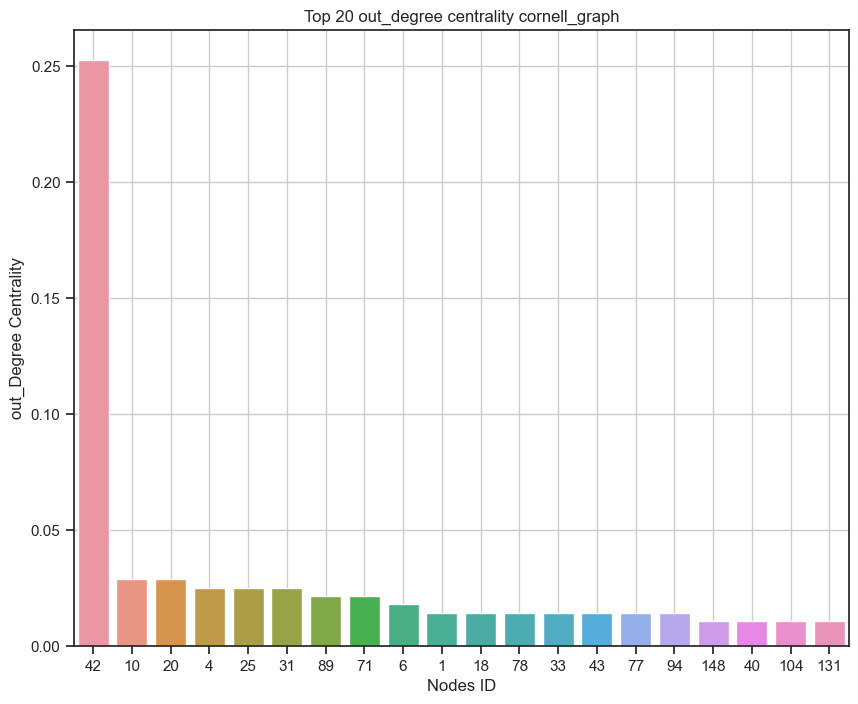

In [16]:

keys = list(map(str,list(cornell_out_degree.keys())[:20]))
values = list(cornell_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality cornell_graph')
plt.grid()
plt.show()

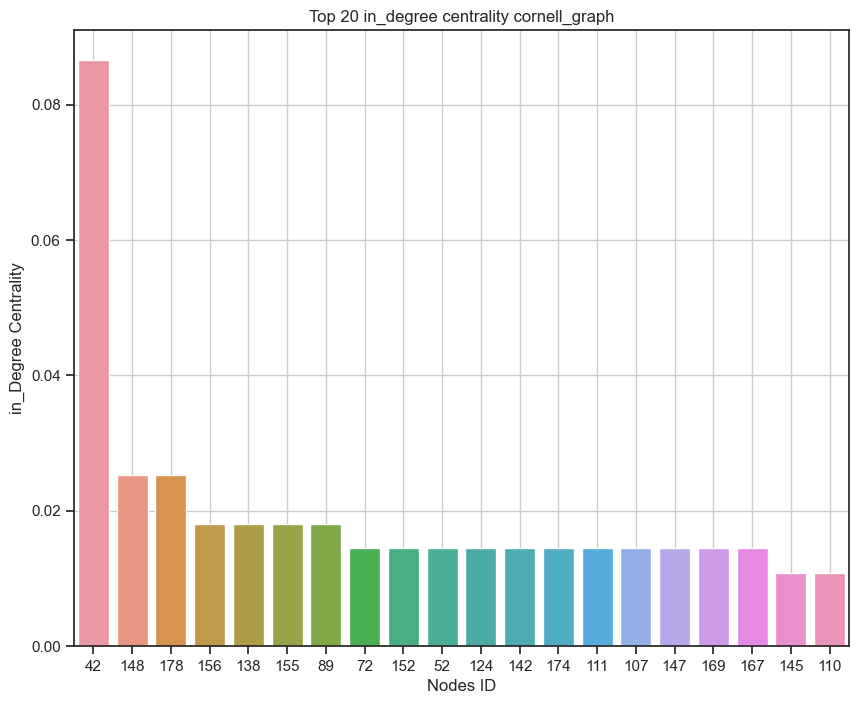

In [17]:
keys = list(map(str,list(cornell_in_degree.keys())[:20]))
values = list(cornell_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality cornell_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_cornell

In [18]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

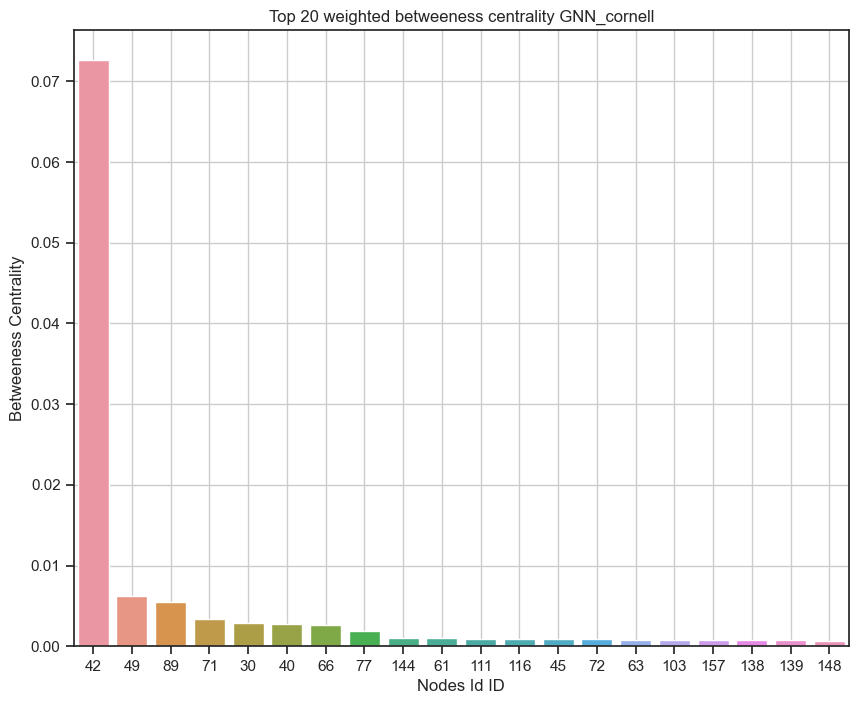

In [19]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_cornell')
plt.grid()
plt.show()

## cornell graph

In [20]:
bet_cornell_graph = nx.betweenness_centrality(cornell_graph)

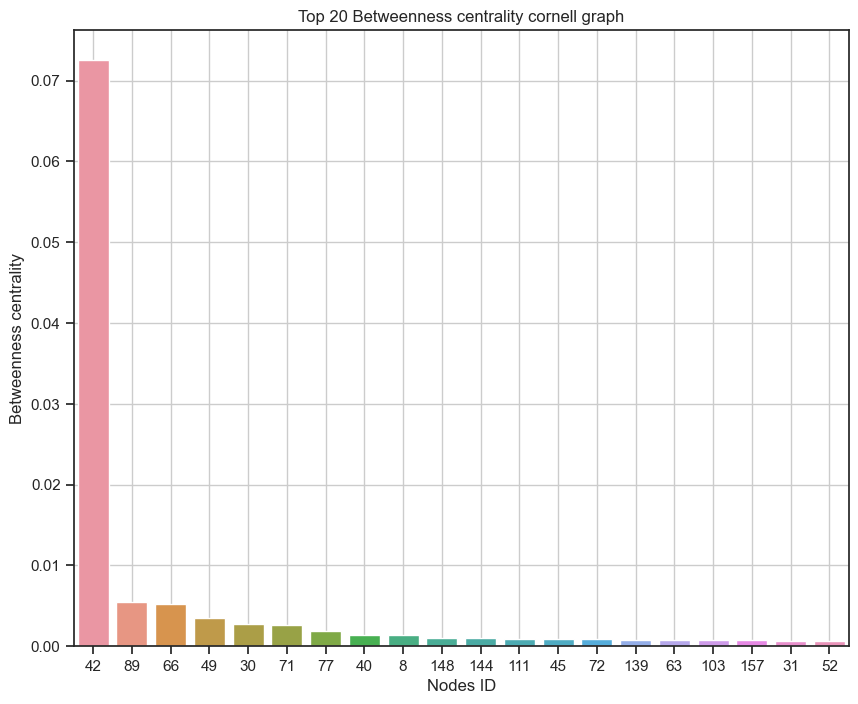

In [21]:
bet_cornell_graph = dict(sorted(bet_cornell_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_cornell_graph.keys())[:20]))
values = list(bet_cornell_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality cornell graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_cornell

In [22]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

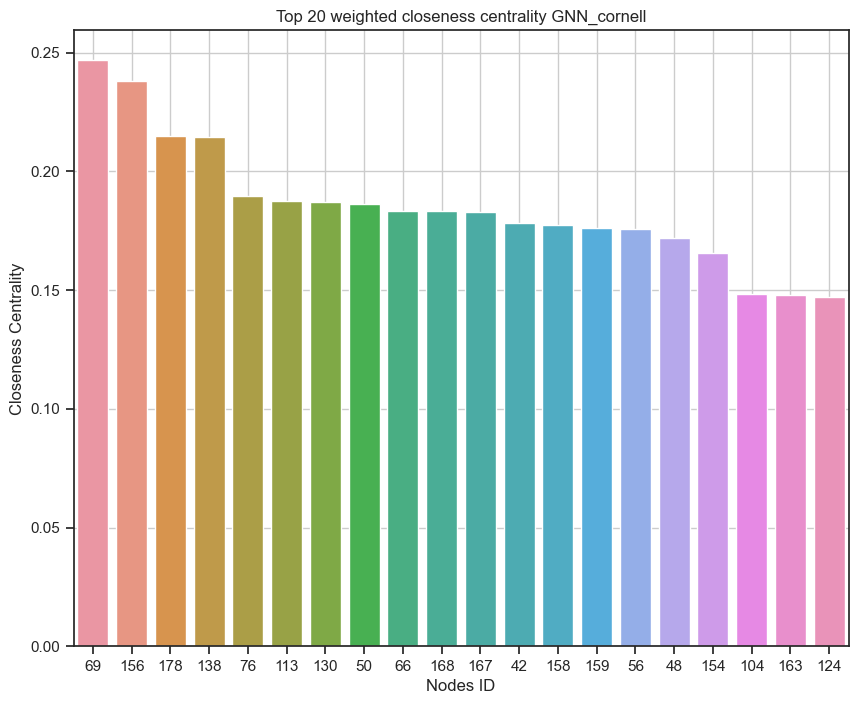

In [23]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_cornell')
plt.grid()
plt.show()

## cornell

In [24]:
closeness_cornell_graph = nx.closeness_centrality(cornell_graph)

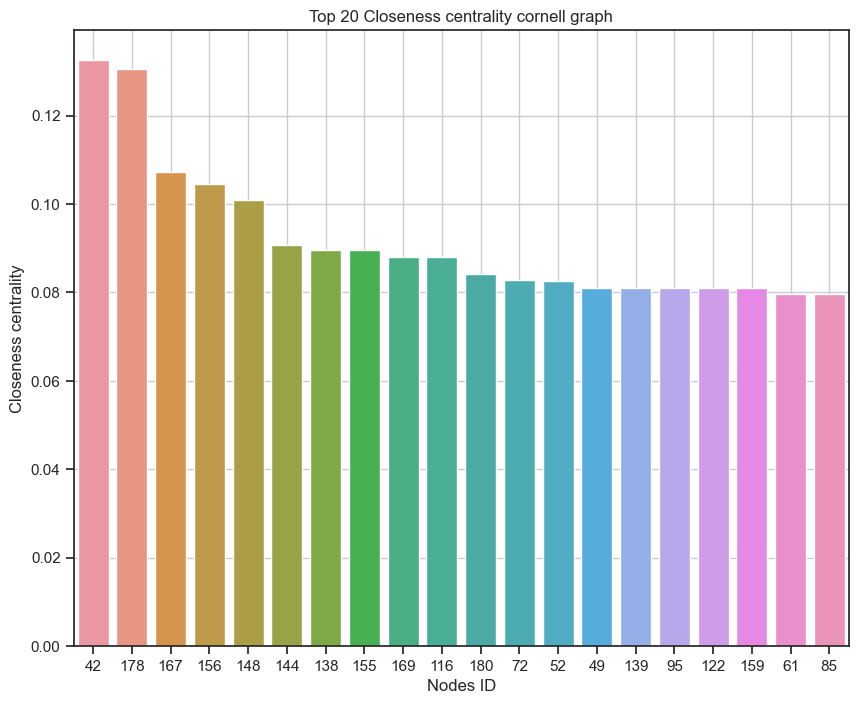

In [25]:
closeness_cornell_graph = dict(sorted(closeness_cornell_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_cornell_graph.keys())[:20]))
values = list(closeness_cornell_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality cornell graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_cornell

In [26]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 1000)

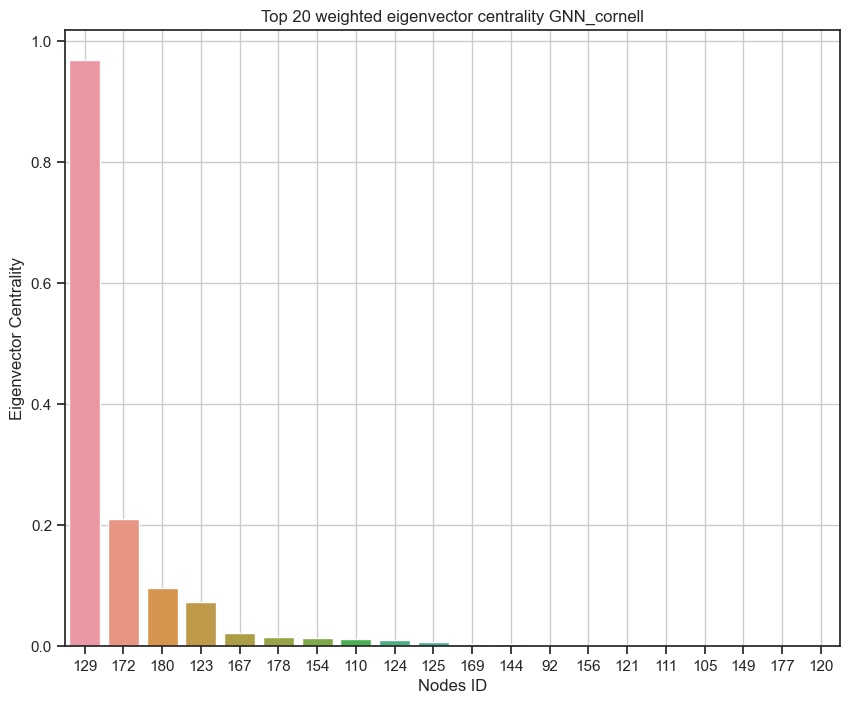

In [27]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_cornell')
plt.grid()
plt.show()

## cornell graph

In [28]:
eigen_cornell_graph = nx.eigenvector_centrality(cornell_graph, max_iter = 1000)

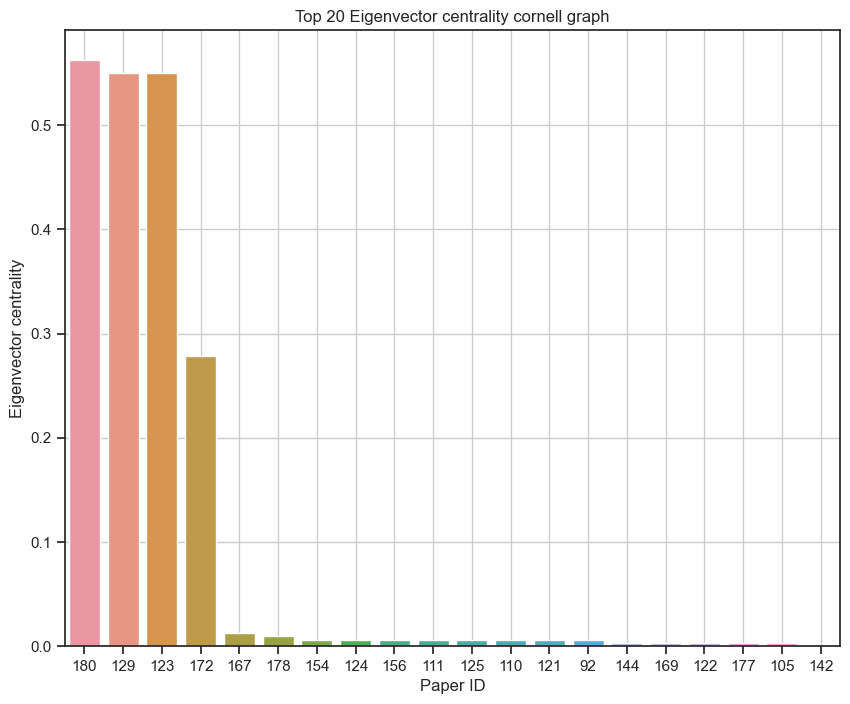

In [29]:
eigen_cornell_graph = dict(sorted(eigen_cornell_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_cornell_graph.keys())[:20]))
values = list(eigen_cornell_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality cornell graph')
plt.grid()
plt.show()

# Efficiency

In [30]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [31]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

0.124

In [32]:
weighted_global_efficiency(cornell_graph)

0.043

## Modularity

In [33]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [34]:
print(weighted_modularty(GNN_sim))

0.765


In [35]:
print(weighted_modularty(cornell_graph))

0.634


# Community

In [36]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_cornell = greedy_modularity_communities(cornell_graph)

In [37]:
print(len(comm_GNN))
print(len(comm_cornell))

17
13


In [38]:
for c in range(len(comm_cornell)):
    print(len(comm_GNN[c]),len(comm_cornell[c]),jaccard(comm_GNN[c], comm_cornell[c]))

63 60 0.7083333333333334
22 24 0.0
15 19 0.0
15 15 0.0
13 15 0.0
12 11 0.0
11 10 0.0
6 9 0.0
6 7 0.0
4 4 0.0
3 3 1.0
3 3 0.0
2 3 0.0


In [39]:
for com in comm_GNN:
    print(len(com))

63
22
15
15
13
12
11
6
6
4
3
3
2
2
2
2
2


In [40]:
for com in comm_cornell:
    print(len(com))

60
24
19
15
15
11
10
9
7
4
3
3
3


In [41]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [42]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [43]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_cornell = [gini_index(i,labels) for i in comm_cornell]
#scipy.stats.wilcoxon(gini_GNN, gini_cornell)

In [44]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_cornell))

mannwhitneyu MannwhitneyuResult(statistic=72.0, pvalue=0.10943731729432847)


In [45]:
df_nodes['label'].unique()

array([3, 0, 2, 4, 1], dtype=int64)

<AxesSubplot:>

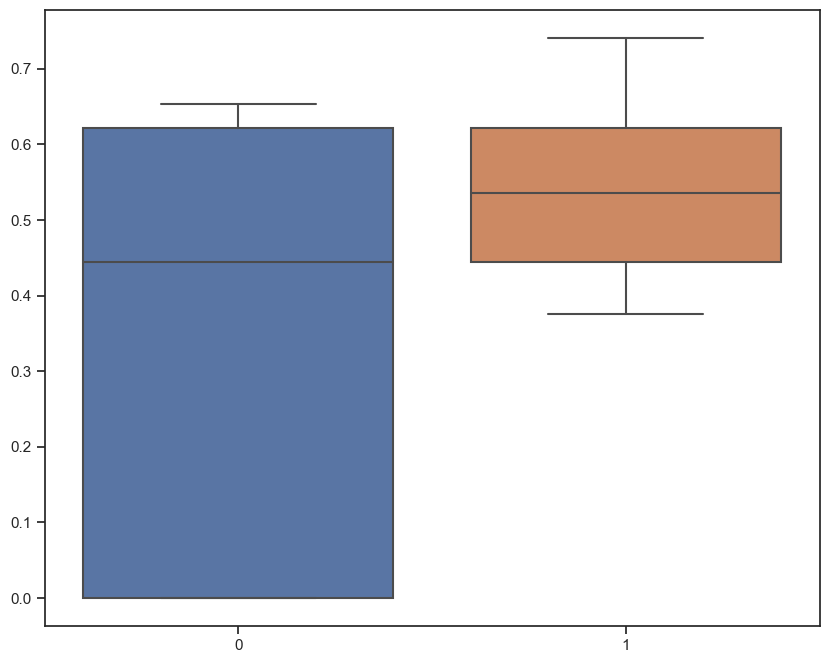

In [46]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_cornell]

sns.boxplot(data=all_arr, )

In [47]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.346

In [48]:
gini=0
clusters = comm_cornell
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.539

In [49]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(cornell_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.09171717171717174
p_value 0.1763545157174482
Jaccard Index: 0.9230769230769231
[42, 4, 89, 20, 6, 78, 31, 1, 71, 10, 25, 18, 33, 77, 23, 94, 131, 38, 66, 16, 106, 24, 30, 15, 40, 82, 104, 108, 55, 19, 43, 22, 41, 8, 63, 102, 3, 139, 100, 17, 5, 7, 2, 11, 0, 14, 12, 21, 101, 26, 27, 36, 124, 138, 56, 142, 72, 29, 79, 140, 147, 60, 148, 84, 45, 34, 99, 126, 35, 85, 149, 117, 57, 28, 9, 157, 39, 52, 37, 49, 47, 127, 91, 61, 143, 107, 144, 54, 13, 32, 44, 135, 51, 110, 69, 93, 53, 111, 116, 141]
[42, 10, 20, 4, 25, 31, 89, 71, 6, 1, 18, 78, 33, 43, 77, 94, 148, 40, 104, 131, 23, 24, 41, 82, 3, 8, 55, 5, 37, 7, 52, 15, 16, 106, 19, 49, 22, 30, 66, 38, 45, 60, 63, 57, 108, 0, 99, 2, 72, 11, 143, 110, 9, 124, 138, 51, 142, 12, 13, 14, 140, 102, 17, 111, 47, 21, 107, 26, 27, 28, 147, 29, 34, 127, 139, 32, 93, 35, 36, 61, 39, 91, 135, 56, 75, 81, 85, 103, 112, 116, 141, 144, 157, 69, 44, 53, 54, 149, 100, 79]


In [50]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(cornell_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.13494949494949499
p_value 0.04665905333740972
Jaccard Index: 0.6260162601626016
[42, 148, 138, 156, 111, 147, 180, 89, 174, 125, 72, 110, 167, 145, 155, 123, 178, 95, 122, 78, 143, 109, 133, 151, 99, 49, 152, 142, 85, 169, 131, 139, 107, 45, 91, 159, 177, 82, 52, 120, 144, 121, 71, 116, 106, 113, 146, 31, 76, 66, 40, 100, 59, 171, 73, 11, 67, 136, 132, 161, 115, 77, 179, 166, 181, 88, 75, 96, 63, 81, 87, 141, 103, 46, 165, 60, 114, 175, 8, 97, 86, 64, 102, 112, 62, 140, 92, 74, 68, 176, 58, 164, 47, 98, 105, 150, 80, 90, 124, 70]
[42, 148, 178, 156, 138, 155, 89, 72, 152, 52, 124, 142, 174, 111, 107, 147, 169, 167, 145, 110, 121, 131, 106, 49, 125, 123, 139, 116, 122, 144, 159, 180, 82, 99, 55, 37, 143, 104, 76, 31, 78, 177, 66, 71, 61, 113, 109, 91, 45, 85, 95, 133, 141, 151, 172, 129, 149, 146, 120, 154, 153, 90, 163, 8, 25, 40, 11, 132, 65, 51, 74, 140, 102, 47, 88, 119, 30, 34, 127, 93, 164, 135, 46, 48, 50, 56, 58, 59, 60, 62, 63, 64, 67, 68, 70, 73, 75, 80, 81, 83]


In [51]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_cornell_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.19474747474747478
p_value 0.004092990506367178
Jaccard Index: 0.9607843137254902
[42, 49, 89, 71, 30, 40, 66, 77, 144, 61, 111, 116, 45, 72, 63, 103, 157, 138, 139, 148, 31, 37, 52, 78, 106, 142, 25, 82, 110, 91, 55, 124, 131, 149, 104, 107, 147, 127, 34, 8, 102, 135, 141, 69, 0, 1, 90, 99, 2, 3, 163, 4, 152, 156, 5, 6, 145, 11, 132, 143, 7, 121, 65, 9, 10, 51, 74, 12, 13, 155, 14, 15, 140, 16, 17, 76, 18, 174, 19, 20, 125, 47, 21, 22, 23, 88, 119, 24, 177, 26, 27, 28, 29, 123, 32, 33, 178, 93, 35, 36]
[42, 89, 66, 49, 30, 71, 77, 40, 8, 148, 144, 111, 45, 72, 139, 63, 103, 157, 31, 52, 61, 138, 85, 60, 78, 37, 106, 142, 25, 91, 110, 124, 116, 82, 131, 147, 127, 149, 107, 55, 140, 104, 102, 135, 141, 69, 34, 0, 1, 90, 99, 2, 3, 163, 4, 152, 156, 5, 6, 145, 11, 132, 143, 7, 121, 65, 9, 10, 51, 74, 12, 13, 155, 14, 15, 16, 17, 76, 18, 174, 19, 20, 125, 47, 21, 22, 23, 88, 119, 24, 177, 26, 27, 28, 29, 123, 32, 33, 178, 93]


In [52]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_cornell_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.052631578947368425
p_value 0.7732194749063227
Jaccard Index: 0.17647058823529413
[69, 156, 178, 138, 76, 113, 130, 50, 66, 168, 167, 42, 158, 159, 56, 48, 154, 104, 163, 124]
[42, 178, 167, 156, 148, 144, 138, 155, 169, 116, 180, 72, 52, 49, 139, 95, 122, 159, 61, 85]


In [53]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_cornell_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.23151515151515156
p_value 0.0006427037259452789
Jaccard Index: 0.9801980198019802
[129, 172, 180, 123, 167, 178, 154, 110, 124, 125, 169, 144, 92, 156, 121, 111, 105, 149, 177, 120, 160, 89, 142, 85, 148, 134, 122, 155, 141, 77, 133, 145, 173, 152, 116, 176, 138, 130, 50, 76, 168, 113, 66, 158, 56, 48, 159, 61, 157, 71, 137, 128, 83, 174, 70, 49, 80, 150, 98, 52, 58, 100, 68, 62, 112, 64, 86, 45, 97, 175, 60, 165, 72, 46, 103, 139, 87, 170, 81, 63, 96, 75, 181, 166, 179, 115, 151, 109, 143, 161, 136, 67, 153, 107, 95, 73, 171, 146, 59, 114]
[180, 129, 123, 172, 167, 178, 154, 124, 156, 111, 125, 110, 121, 92, 144, 169, 122, 177, 105, 142, 148, 89, 149, 145, 85, 133, 155, 141, 174, 77, 176, 120, 173, 100, 134, 160, 116, 95, 152, 138, 49, 139, 66, 61, 72, 52, 109, 159, 143, 76, 71, 113, 45, 151, 46, 48, 50, 56, 58, 59, 60, 62, 63, 64, 67, 68, 70, 73, 75, 80, 81, 83, 86, 87, 96, 97, 98, 103, 112, 115, 128, 130, 136, 137, 150, 157, 158, 161, 165, 166, 168, 171, 175, 179, 181, 146, 9